<img src="https://geodecode.com.br/wp-content/uploads/2021/12/brasildatacube.png" align="left" style="height: 65px"/>
<img src="https://earth.bsc.es/harmonize/lib/exe/fetch.php?h=250&crop=0&tok=cfb750&media=wiki:logo.png" align="right" style="height: 65px"/>

<h1 style="color:#336699; text-align: center">BDC Lab Demostration - 2024 Harmonize Annual Meeting</h1>
<h3 style="color:#336699; text-align: center">Weekly charts</h3>
<hr style="border:2px solid #0077b9;">

<div style="text-align: center; font-size: 90%;">
    Luana Becker da Luz <a href="https://orcid.org/0000-0002-9916-1167"><i class="fab fa-orcid" aria-hidden="true" style="color: green"></i></a>,
    Ana Paula Dal'Asta <a href="https://orcid.org/0000-0002-1286-9067"><i class="fab fa-orcid" aria-hidden="true" style="color: green"></i></a>
    <br/>
    <br/>
    <h3>WORK IN PROGRESS</h3>
    <br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: 
    <a href="mailto:luana.luz@inpe.br">luana.luz@inpe.br;</a>
    <a href="mailto:ana.dalasta@inpe.br">ana.dalasta@inpe.br;</a>
    <a href="mailto:miguel.monteiro@inpe.br">miguel.monteiro@inpe.br</a>
    <br/>
    <br/>
    <div style="width: 60%; margin: auto">
        <div style="text-align: center; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 10px;">
            This code open dengue, temperature, precipitation and NDVI weekly data for all 21 municipalities and plot scatter plots.
        </div>
    </div>
</div>

<h1 align="center">
  <img src="README_flowchart_roi.png" width="70%" style="text-align: center"/>
</h1>


In [3]:
library(sf)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# 1. Set year

In [15]:
YEAR <- "2019"
# YEAR <- "2020"

# 2. Read CSVs
<hr style="border:1px solid #0077b9;">

### Read municipality code and name

In [16]:
shape_df <- st_read("roi/mun_indireto_PA.shp") %>%
  as.data.frame() %>%
  select(CD_MUN, NM_MUN) %>%
  rename(cd_mun = CD_MUN, nm_mun = NM_MUN) %>%
  # Removes last char of municipality cd_mun
  mutate(cd_mun = substr(cd_mun, 1, nchar(cd_mun) - 1))
  
dim(shape_df)
head(shape_df)

[1] 21  2

,cd_mun,nm_mun
,<chr>,<chr>
1,150010,Abaetetuba
2,150080,Ananindeua
3,150110,Bagre
4,150120,Baião
5,150130,Barcarena
6,150140,Belém


### Read temperature data 

In [31]:
FILENAME <- paste0("csvs/data_tempmaxmean_weeks_", YEAR, ".csv")

temperature_df <- read.csv(FILENAME) %>%
  select(cd_mun, date, temperature) %>%
  mutate(cd_mun = substr(cd_mun, 1, nchar(cd_mun) - 1)) %>%
  arrange(date)

dim(temperature_df)
head(temperature_df)


[1] 1092    3

,cd_mun,date,temperature
,<chr>,<chr>,<dbl>
1,150010,2019-01-06,29.88171
2,150080,2019-01-06,29.66934
3,150110,2019-01-06,29.39392
4,150120,2019-01-06,30.07768
5,150130,2019-01-06,29.68408
6,150140,2019-01-06,28.65426


### 1.2 Read dengue data

In [34]:
FILENAME <- paste0("csvs/data_denguecases_weeks_", YEAR, ".csv")

dengue_df <- read.csv(FILENAME) %>%
  arrange(date)

dim(dengue_df)
head(dengue_df)

[1] 1113    3

,cd_mun,date,dengue
,<int>,<chr>,<dbl>
1,150010,2019-01-06,0.00
2,150080,2019-01-06,0.19
3,150110,2019-01-06,0.00
4,150120,2019-01-06,0.00
5,150130,2019-01-06,0.00
6,150140,2019-01-06,0.07


### 1.3 Read precipitation data

In [36]:
FILENAME <- paste0("csvs/data_precipmax_weeks_", YEAR, ".csv")

precipitation_df <- read.csv(FILENAME) %>%
  select(cd_mun, date, precipitation) %>%
  mutate(cd_mun = substr(cd_mun, 1, nchar(cd_mun) - 1)) %>%
  arrange(date)

dim(precipitation_df)
head(precipitation_df)

[1] 1092    3

,cd_mun,date,precipitation
,<chr>,<chr>,<dbl>
1,150010,2019-01-06,24.00957
2,150080,2019-01-06,22.96025
3,150110,2019-01-06,21.23908
4,150120,2019-01-06,26.12706
5,150130,2019-01-06,19.11404
6,150140,2019-01-06,26.85553


### 1.4 Read NDVI data

In [49]:
FILENAME <- paste0("csvs/data_ndvi_weeks_", YEAR, ".csv")

ndvi_df <- read.csv(FILENAME) %>%
  # Add days to match epidemiological weeks
  mutate(date = format(as.Date(date) + 5, "%Y-%m-%d")) %>%
  mutate(cd_mun = substr(cd_mun, 1, nchar(cd_mun) - 1)) %>%
  arrange(date)

dim(ndvi_df)
head(ndvi_df, 30)


# options(repr.plot.width = 14, repr.plot.height = 8)

# ndvi_df %>%
#   ggplot(aes(x = date, y = ndvi, colour = cd_mun)) +
#     geom_point(size = 3) +
#     theme_bw() +
#     theme(text = element_text(size = 22))


[1] 1071    3

,cd_mun,date,ndvi
,<chr>,<chr>,<dbl>
1,150010,2019-01-06,0.01824569
2,150080,2019-01-06,0.01912000
3,150110,2019-01-06,0.02154225
4,150120,2019-01-06,0.02071948
5,150130,2019-01-06,0.01647728
6,150140,2019-01-06,0.01389951
7,150150,2019-01-06,0.01922845
8,150178,2019-01-06,0.01990573
9,150210,2019-01-06,0.01906776


# 2. Merge dataframes
<hr style="border:1px solid #0077b9;">

In [50]:
merge_health_climate_ndvi <- dengue_df %>%
  merge(temperature_df, by = c("cd_mun", "date"), all = T) %>%
  merge(precipitation_df, by = c("cd_mun", "date"), all = T) %>%
  merge(ndvi_df, by = c("cd_mun", "date"), all = T) %>%
  merge(shape_df, by = c("cd_mun"), all = T) %>%
  # Convert date to week number and set as factor
  mutate(week = factor(lubridate::isoweek(date), levels = as.character(1:52))) %>%
  arrange(cd_mun, date)

dim(merge_health_climate_ndvi)
head(merge_health_climate_ndvi)

[1] 1113    8

,cd_mun,date,dengue,temperature,precipitation,ndvi,nm_mun,week
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
1,150010,2019-01-06,0,29.88171,24.00957,0.01824569,Abaetetuba,1
2,150010,2019-01-13,0,30.38451,18.35159,NA,Abaetetuba,2
3,150010,2019-01-20,0,29.81581,17.97792,0.01896403,Abaetetuba,3
4,150010,2019-01-27,0,31.60663,15.34332,NA,Abaetetuba,4
5,150010,2019-02-03,0,29.91539,128.06192,0.01684345,Abaetetuba,5
6,150010,2019-02-10,0,30.89762,36.83847,NA,Abaetetuba,6


# 3. Scatter Plots
<hr style="border:1px solid #0077b9;">

### 2.1 Dengue vs. Precipitation

Warning message:
“Removed 21 rows containing missing values or values outside the scale range
(`geom_point()`).”


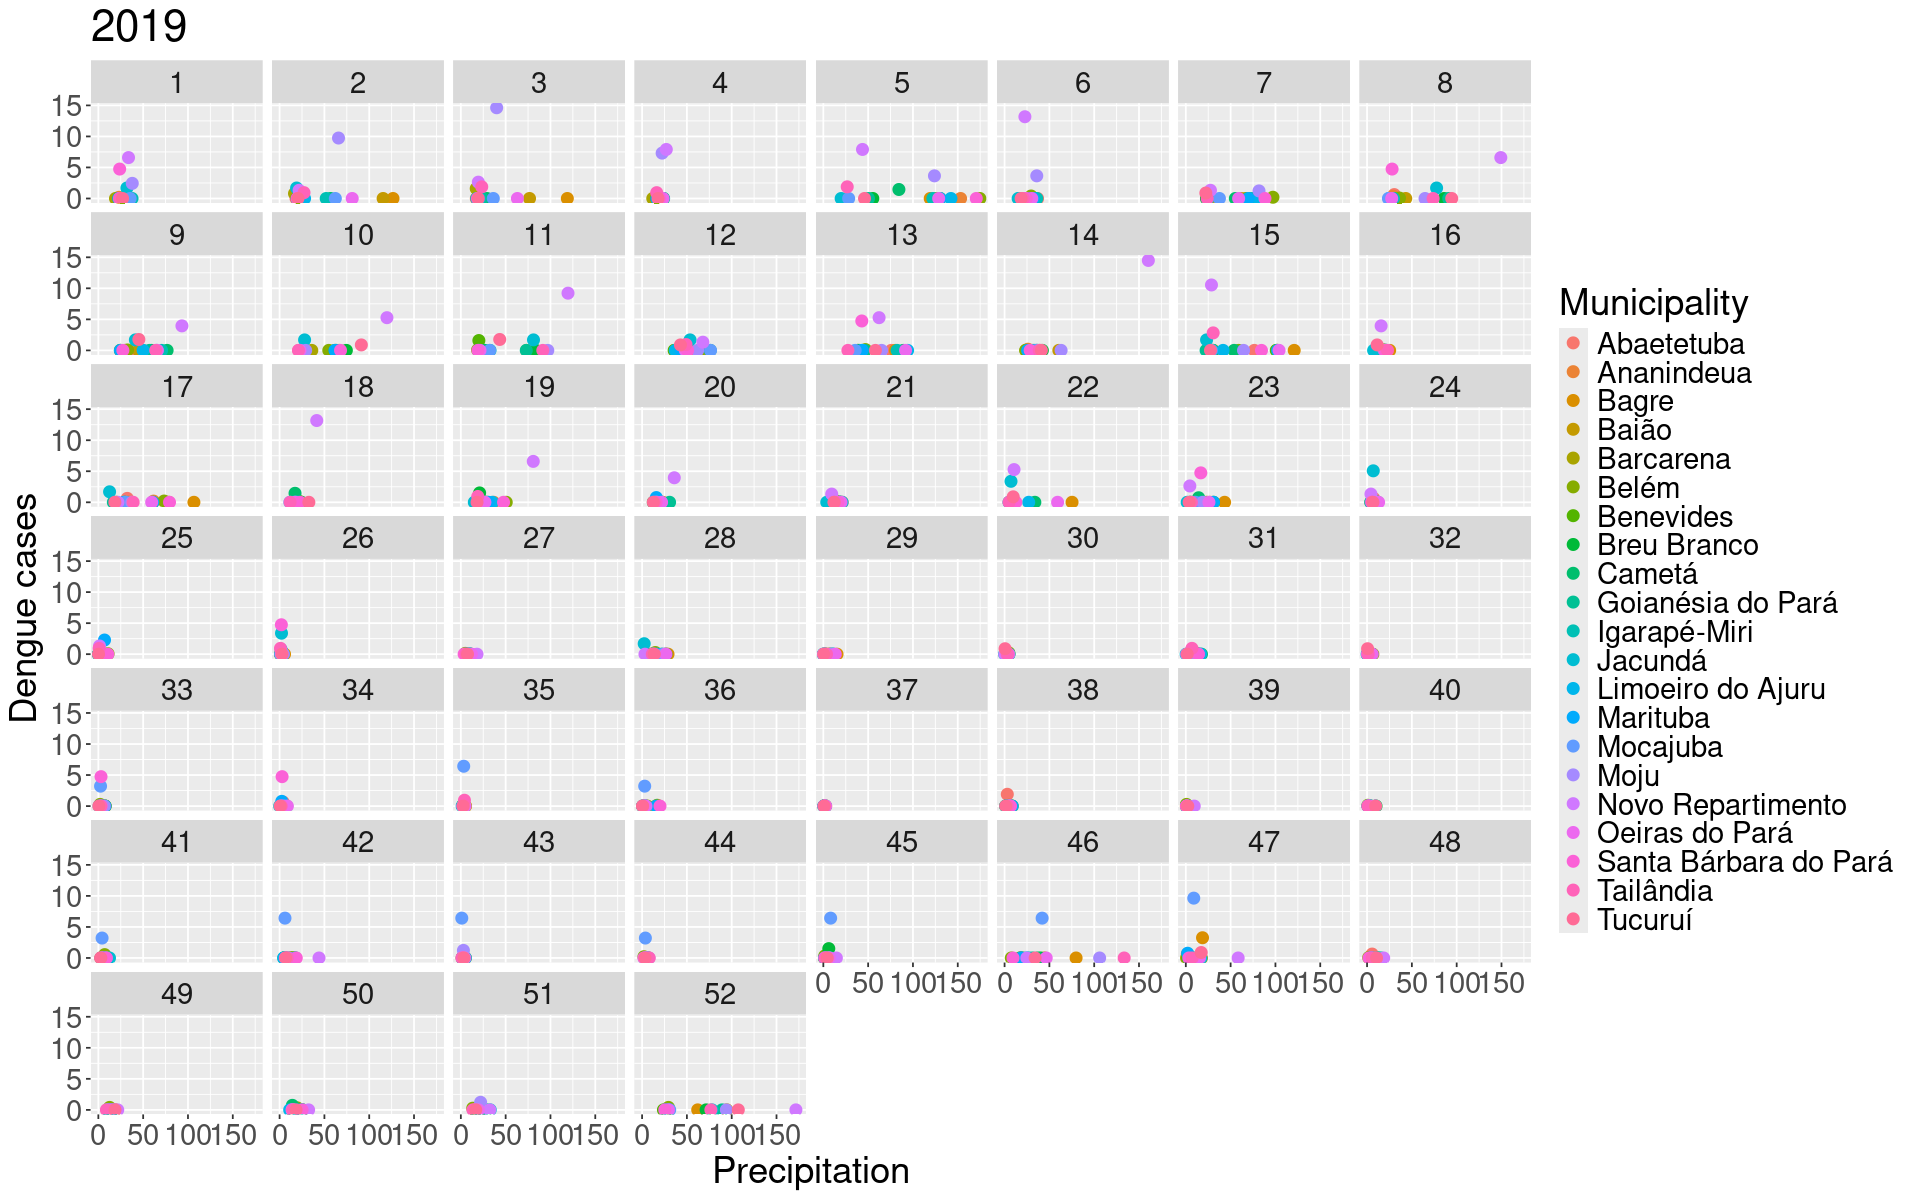

In [51]:
options(repr.plot.width = 16, repr.plot.height = 10)
ggplot(merge_health_climate_ndvi) +
  geom_point(aes(x = precipitation, y = dengue, colour = nm_mun), size = 3) +
  facet_wrap(week ~ .) +
  scale_colour_discrete(name = "Municipality") +
  scale_x_continuous(name = "Precipitation") +
  scale_y_continuous(name = "Dengue cases") +
  labs(title = YEAR) +
  theme(
    legend.position = "right",
    text = element_text(size = 22)
  ) +
  guides(color = guide_legend(ncol = 1))

### 2.2 Dengue vs. Temperature

Warning message:
“Removed 21 rows containing missing values or values outside the scale range
(`geom_point()`).”


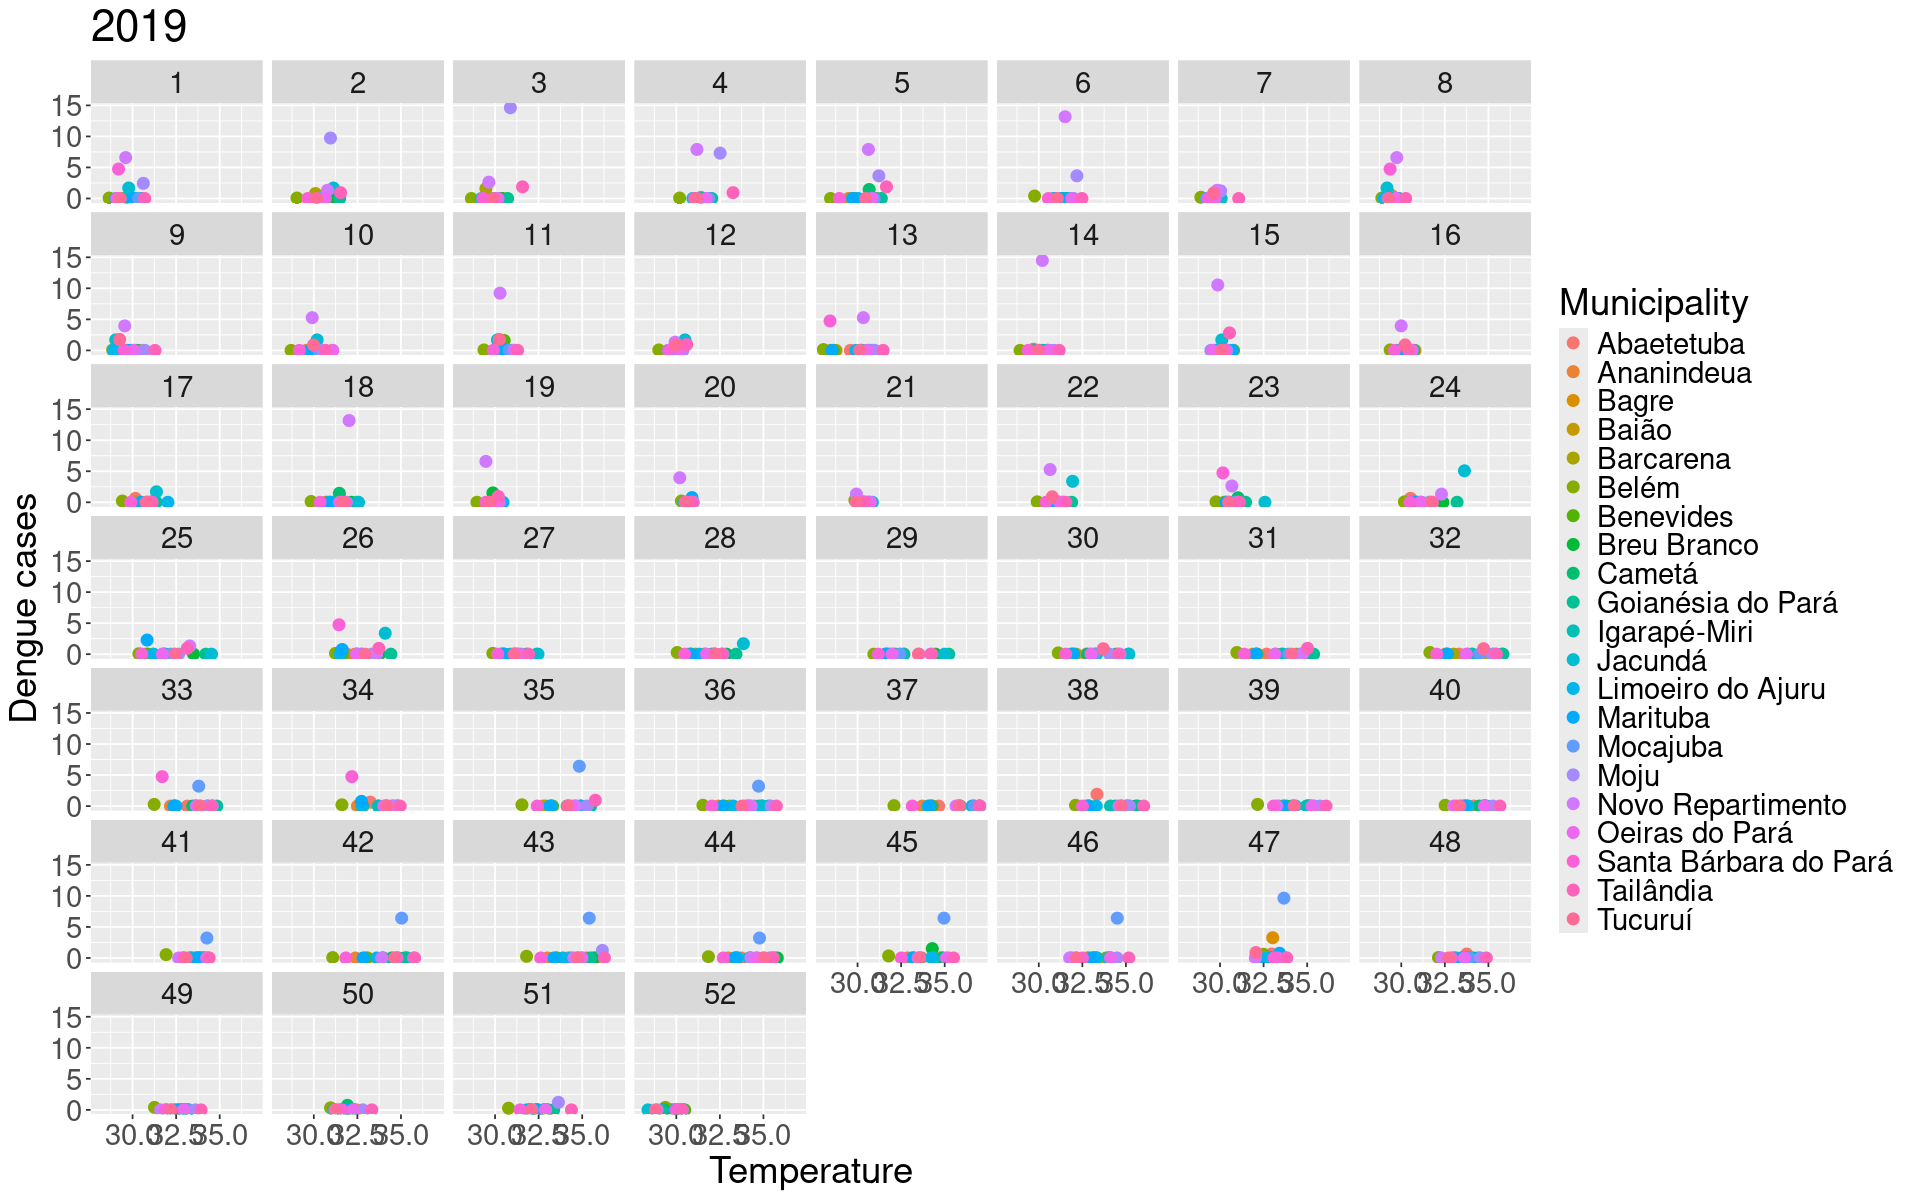

In [52]:
options(repr.plot.width = 16, repr.plot.height = 10)

ggplot(merge_health_climate_ndvi) +
  geom_point(aes(x = temperature, y = dengue, colour = nm_mun), size = 3) +
  facet_wrap(week ~ .) +
  scale_colour_discrete(name = "Municipality") +
  scale_x_continuous(name = "Temperature") +
  scale_y_continuous(name = "Dengue cases") +
  labs(title = YEAR) +
  theme(
    legend.position = "right",
    text = element_text(size = 22)
  ) +
  guides(color = guide_legend(ncol = 1))

### 2.3 Dengue vs. NDVI

Warning message:
“Removed 630 rows containing missing values or values outside the scale range
(`geom_point()`).”


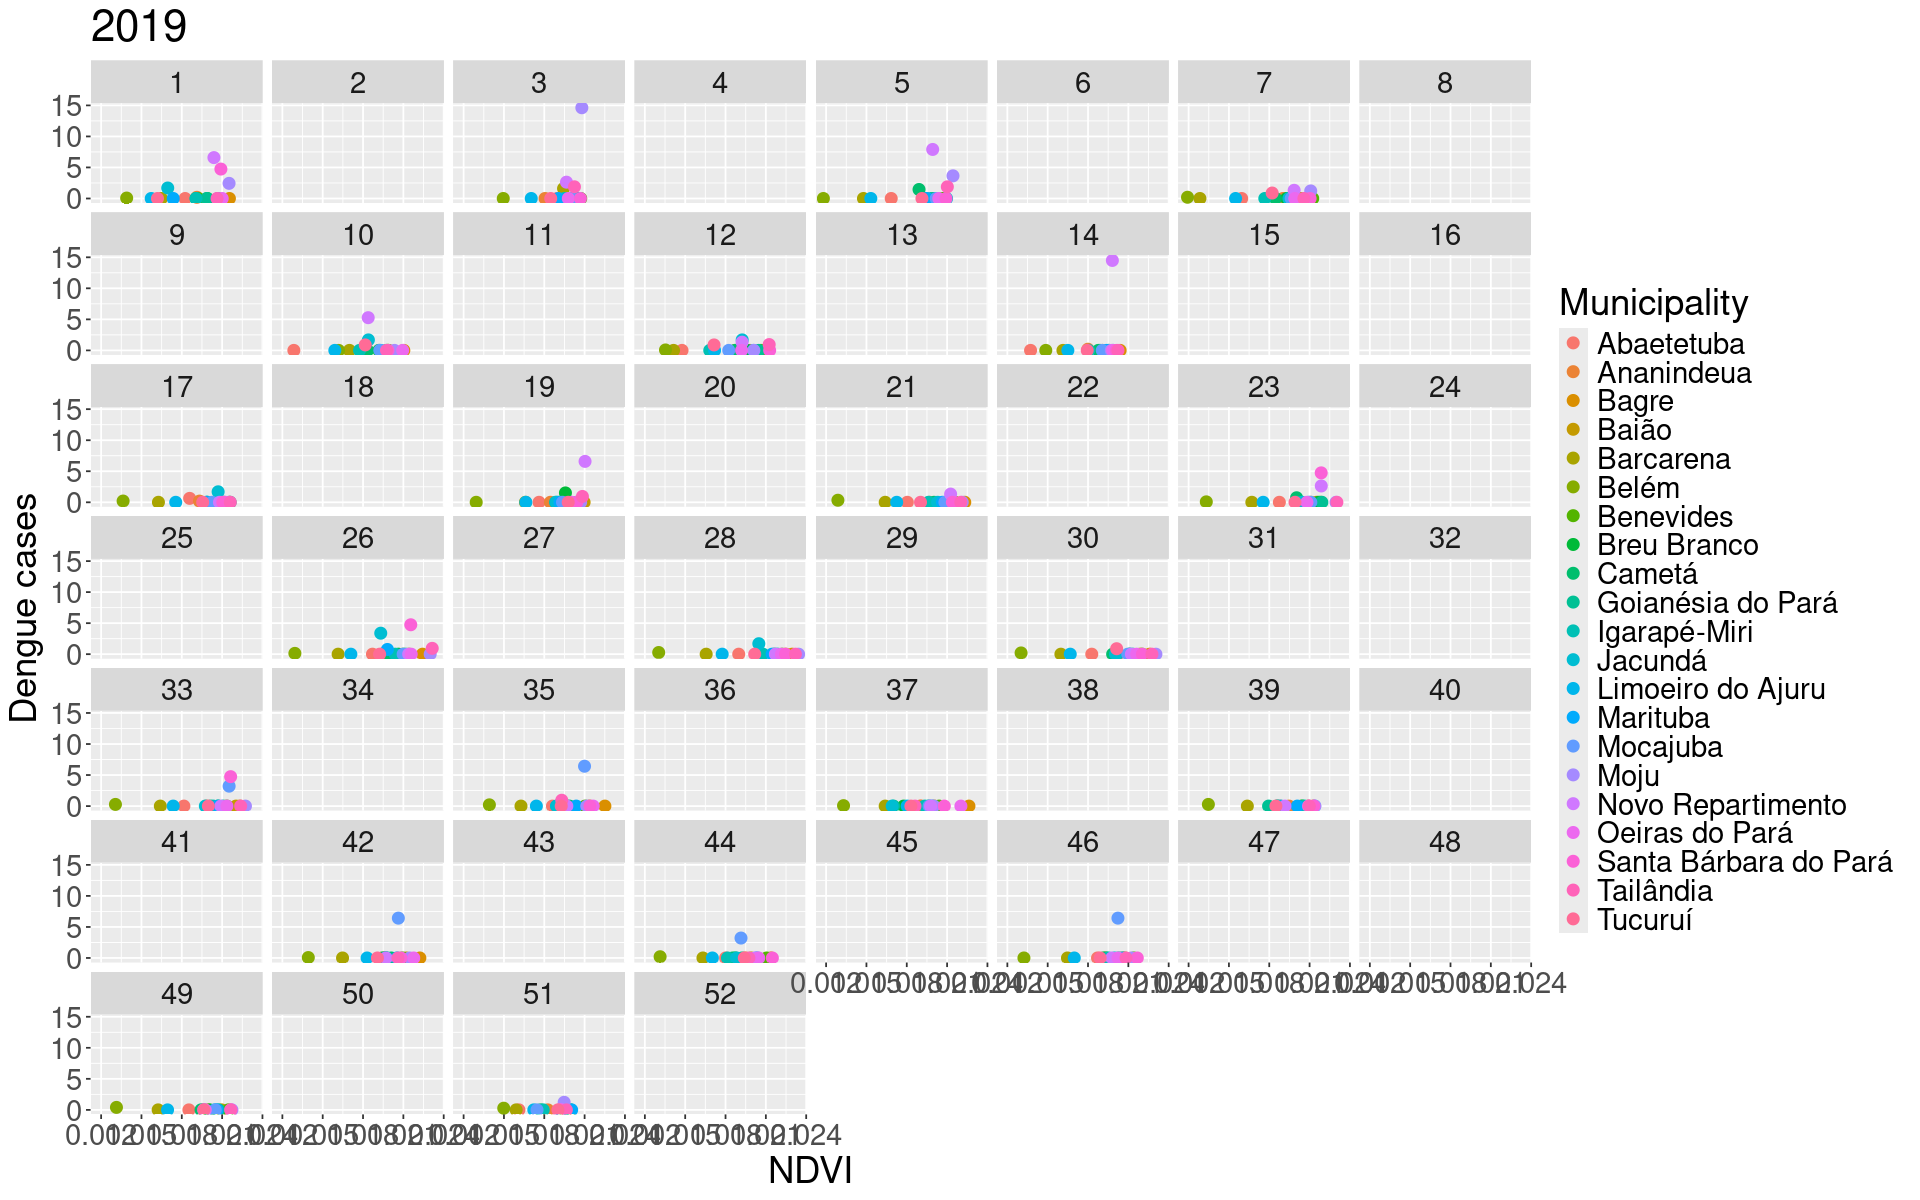

In [53]:
options(repr.plot.width = 16, repr.plot.height = 10)
ggplot(merge_health_climate_ndvi) +
  geom_point(aes(x = ndvi, y = dengue, colour = nm_mun), size = 3) +
  facet_wrap(week ~ .) +
  scale_colour_discrete(name = "Municipality") +
  scale_x_continuous(name = "NDVI") +
  scale_y_continuous(name = "Dengue cases") +
  labs(title = YEAR) +
  theme(
    legend.position = "right",
    text = element_text(size = 22)
  ) +
  guides(color = guide_legend(ncol = 1))